## Analyzing the New York Times comments section

We're continuing with the <a href="https://developer.nytimes.com/">NYT API</a> theme by experimenting with their API for article comments. We'll be completing two major tasks:
- find out where people are commenting from 
- get the most common words from a specific comment 

Keep in mind that we'll be covering API calls and JSON more thoroughly in a few weeks, so don't worry about understanding this first part for now.

In [85]:
#import requests and json
import requests
import json

#put your custom settings for the API call here
#you MUST provide an API key, offset value, and article URL
api_key = "6DbyQjT9VRm2FACQ6BAvek8ayVlfQGCK"
offset = str(0)
article_url = "https://www.nytimes.com/2020/06/12/opinion/sunday/floyd-protests-white-supremacy.html"
sort = "reader"

#show the API url with all the settings listed out
api_url = "https://api.nytimes.com/svc/community/v3/user-content/url.json?api-key=%s&offset=%s&sort=%s&url=%s" %(api_key, offset, sort, article_url)
print(api_url)

https://api.nytimes.com/svc/community/v3/user-content/url.json?api-key=6DbyQjT9VRm2FACQ6BAvek8ayVlfQGCK&offset=0&sort=reader&url=https://www.nytimes.com/2020/06/12/opinion/sunday/floyd-protests-white-supremacy.html


In [86]:
# calling the API with requests
response = requests.get(api_url)
# creating a variable called data to hold the json formatted result
data = response.json()

In [87]:
# look at all of the data
# it's a lot of nested dictionaries!
print(type(data))
data

<class 'dict'>


{'debug': {'version': 4, 'nyt-com-shim': True},
 'status': 'OK',
 'copyright': 'Copyright (c) 2020 The New York Times Company.  All Rights Reserved.',
 'results': {'callerID': None,
  'api_timestamp': '1592425630',
  'comments': [{'commentID': 107564420,
    'status': 'approved',
    'commentSequence': 107564420,
    'userID': 72595694,
    'userDisplayName': 'JM',
    'userLocation': 'New York',
    'userTitle': 'NULL',
    'userURL': 'NULL',
    'picURL': None,
    'commentTitle': '<br\\//>',
    'commentBody': '"What’s more, as election season begins in earnest, Americans are going to the ballot box as well." Sustaining this momentum will be absolutely essential: Trump and every elected official who supports him, from local dog-catcher to US Senator, must be vanquished at the polls.',
    'createDate': '1591956558',
    'updateDate': '1592253501',
    'approveDate': '1591956558',
    'recommendations': 666,
    'replyCount': 13,
    'replies': [{'commentID': 107566999,
      'status

In [88]:
# isolate just the comments dictionary
comment_info = data['results']['comments']
comment_info

[{'commentID': 107564420,
  'status': 'approved',
  'commentSequence': 107564420,
  'userID': 72595694,
  'userDisplayName': 'JM',
  'userLocation': 'New York',
  'userTitle': 'NULL',
  'userURL': 'NULL',
  'picURL': None,
  'commentTitle': '<br\\//>',
  'commentBody': '"What’s more, as election season begins in earnest, Americans are going to the ballot box as well." Sustaining this momentum will be absolutely essential: Trump and every elected official who supports him, from local dog-catcher to US Senator, must be vanquished at the polls.',
  'createDate': '1591956558',
  'updateDate': '1592253501',
  'approveDate': '1591956558',
  'recommendations': 666,
  'replyCount': 13,
  'replies': [{'commentID': 107566999,
    'status': 'approved',
    'commentSequence': 107566999,
    'userID': 34609658,
    'userDisplayName': 'Kristina',
    'userLocation': 'DC',
    'userTitle': 'NULL',
    'userURL': 'NULL',
    'picURL': None,
    'commentTitle': '<br\\//>',
    'commentBody': "@JM \n\nD

In [89]:
# use list comprehension to create a list out of just the values from the userLocation key
locations = [ sub['userLocation'] for sub in comment_info ]
locations

['New York',
 'Vermont',
 'Vermont',
 'San Jose, CA',
 'Massachusetts',
 'Massachusetts',
 'Massachusetts',
 'great neck new york',
 'Cactose',
 'WI',
 'Fort Lee, N,J.',
 'Westchester, NY',
 'Pullman WA',
 'San Francisco',
 'Philadelphia',
 'Rehoboth Beach, Delaware',
 'Old Pueblo',
 'Los Angeles',
 'Colorado',
 'Dover, N.J.',
 'New Jersey',
 'Pennsylvania',
 'Massachusetts',
 'Littleton, CO',
 'Maryland']

In [90]:
#convert this list to a set to see a list of unique locations people are commenting from
unique_locations = set(locations)
print(unique_locations)

{'Vermont', 'Littleton, CO', 'Los Angeles', 'great neck new york', 'San Jose, CA', 'WI', 'Maryland', 'Fort Lee, N,J.', 'Philadelphia', 'New Jersey', 'Pennsylvania', 'Westchester, NY', 'Pullman WA', 'Massachusetts', 'Dover, N.J.', 'San Francisco', 'Colorado', 'New York', 'Cactose', 'Old Pueblo', 'Rehoboth Beach, Delaware'}


In [91]:
# use list comprehension to create a list out of just the values from the commentBody key
comments = [ sub['commentBody'] for sub in comment_info ]
comments

['"What’s more, as election season begins in earnest, Americans are going to the ballot box as well." Sustaining this momentum will be absolutely essential: Trump and every elected official who supports him, from local dog-catcher to US Senator, must be vanquished at the polls.',
 'Help me understand. In what countries does the victors in war put up monuments to those that warred against them, took their sons and daughters lives, destroyed homes and lands, and cost untold treasure?  The Civil War was a tragedy for this country. It showed the long standing evil of an economy based on human slavery. It was a fight to end or keep the “United “ States. \nI do not believe we should be honoring the side of the war that brought us to it, and has perpetuated white supremacy ideology, mass incarceration, organized housing and employment discrimination and much evil. Historically the US has called on its fellow citizens of color to defend it in two world wars, the Vietnam war and more only to br

In [92]:
#look at just one of the comments
specific_comment = comments[12]
print(specific_comment)

I just looked up white supremacy.  It is apparently the belief that whites are superior to other people and therefore have the right to dominate them.

Some whites still believe this nonsense, but most do not.  Personally, I have not heard this kind of stuff from other whites I know for decades. 

Believing that people should be judged as individuals is not white supremacy. Requiring that all people meet basic requirements of civilized behavior and achievement is not white supremacy.  Requiring people to avoid criminal behavior is not white supremacy. Resisting those who desire unjust compensation based on their membership in a specific group is not white supremacy.

Those things are instead characteristics of advanced societies not in the grip of hysteria.


In [93]:
# lowercase the comment and remove punctuation
# you can use the code we wrote for the lexical richness exercise to do this
text_lower = specific_comment.lower()
text_clean = text_lower.replace(',','').replace('.','').replace('"','')
print(text_clean)

i just looked up white supremacy  it is apparently the belief that whites are superior to other people and therefore have the right to dominate them

some whites still believe this nonsense but most do not  personally i have not heard this kind of stuff from other whites i know for decades 

believing that people should be judged as individuals is not white supremacy requiring that all people meet basic requirements of civilized behavior and achievement is not white supremacy  requiring people to avoid criminal behavior is not white supremacy resisting those who desire unjust compensation based on their membership in a specific group is not white supremacy

those things are instead characteristics of advanced societies not in the grip of hysteria


In [94]:
# split text into list
text_data = text_clean.split()

# create a dictionary
wordfreq = {}

# go through each word in text_data
for word in text_data:
    # if the word isn't in the dictionary, add it as a key AND give it a value of 1
    if word not in wordfreq.keys():
        wordfreq[word] = 1
     # if the word IS in the dictionary, add 1 to the value
    else:
        wordfreq[word] += 1
print(wordfreq)

{'i': 3, 'just': 1, 'looked': 1, 'up': 1, 'white': 5, 'supremacy': 5, 'it': 1, 'is': 5, 'apparently': 1, 'the': 3, 'belief': 1, 'that': 3, 'whites': 3, 'are': 2, 'superior': 1, 'to': 3, 'other': 2, 'people': 4, 'and': 2, 'therefore': 1, 'have': 2, 'right': 1, 'dominate': 1, 'them': 1, 'some': 1, 'still': 1, 'believe': 1, 'this': 2, 'nonsense': 1, 'but': 1, 'most': 1, 'do': 1, 'not': 7, 'personally': 1, 'heard': 1, 'kind': 1, 'of': 4, 'stuff': 1, 'from': 1, 'know': 1, 'for': 1, 'decades': 1, 'believing': 1, 'should': 1, 'be': 1, 'judged': 1, 'as': 1, 'individuals': 1, 'requiring': 2, 'all': 1, 'meet': 1, 'basic': 1, 'requirements': 1, 'civilized': 1, 'behavior': 2, 'achievement': 1, 'avoid': 1, 'criminal': 1, 'resisting': 1, 'those': 2, 'who': 1, 'desire': 1, 'unjust': 1, 'compensation': 1, 'based': 1, 'on': 1, 'their': 1, 'membership': 1, 'in': 2, 'a': 1, 'specific': 1, 'group': 1, 'things': 1, 'instead': 1, 'characteristics': 1, 'advanced': 1, 'societies': 1, 'grip': 1, 'hysteria': 1}

In [95]:
# let's just look at the more commonly used words
# use dict comprehension to create a new dictionary that doesn't include words that are only written once
topwords = {key:val for key, val in wordfreq.items() if val > 1}
print(topwords)

{'i': 3, 'white': 5, 'supremacy': 5, 'is': 5, 'the': 3, 'that': 3, 'whites': 3, 'are': 2, 'to': 3, 'other': 2, 'people': 4, 'and': 2, 'have': 2, 'this': 2, 'not': 7, 'of': 4, 'requiring': 2, 'behavior': 2, 'those': 2, 'in': 2}


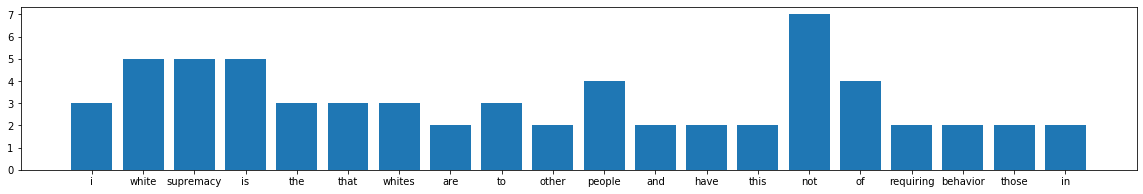

In [96]:
# BONUS: a quick data visualization!
# don't worry, we'll cover this more later on

import matplotlib.pyplot as plt

# IMPORTANT: change "topwords" to whatever you named your dictionary of most common words!
keys = topwords.keys()
values = topwords.values()

fig= plt.figure(figsize=(20,3))
plt.bar(keys, values)

plt.show()

## Going further
What other insights can you gain from this data?
- Can you look at word frequency for the full list of comments, instead of just one specific comment?
- Can you clean up the location data so that it's uniform, by state and/or country?
- Can you create a list of comments that only contain certain phrases or keywords?
- Can you figure out whether a commenter largely agrees or disagrees with the article?